In [1]:
# Install TensorFlow
!pip install tensorflow

In [2]:
from google.colab import drive
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras import layers, models

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Menentukan base path, train path, dan test path di Google Drive
base_path = '/content/drive/MyDrive/Bangkit-Capstone-CH2-PS132/dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

In [5]:
#Immage size VGG19
img_size = (224, 224)

In [6]:
# Data augmentation training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
# Rescaling validation dataset
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Loading training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 6 classes.


In [9]:
# Loading validation dataset
val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 59 images belonging to 6 classes.


In [10]:
# Load pre-trained VGG19 model tanpa top (fully connected) layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [11]:
# Freeze convolutional layers VGG19
for layer in vgg19_base.layers:
    layer.trainable = False

In [12]:
# Buat model baru pada layer top VGG19
model = models.Sequential([
    vgg19_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
8/8 [==============================] - 122s 15s/step - loss: 6.3793 - accuracy: 0.2542 - val_loss: 0.7781 - val_accuracy: 0.6441
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 1.6422 - accuracy: 0.5833 - val_loss: 0.5500 - val_accuracy: 0.8136
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.6969 - accuracy: 0.7708 - val_loss: 0.2667 - val_accuracy: 0.9661
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.4007 - accuracy: 0.8917 - val_loss: 0.2128 - val_accuracy: 0.9661
Epoch 5/10
8/8 [==============================] - 36s 5s/step - loss: 0.2983 - accuracy: 0.9042 - val_loss: 0.1403 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 36s 5s/step - loss: 0.2221 - accuracy: 0.9417 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 38s 5s/step - loss: 0.1336 - accuracy: 0.9708 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 8/10
8/8 [================

In [15]:
model.save('/content/drive/MyDrive/Bangkit-Capstone-CH2-PS132/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Install library Matplotlib
!pip install matplotlib

In [17]:
import matplotlib.pyplot as plt

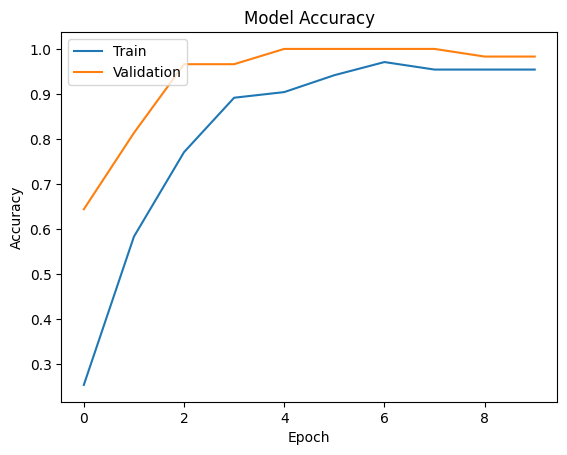

In [18]:
# Plot training dan validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

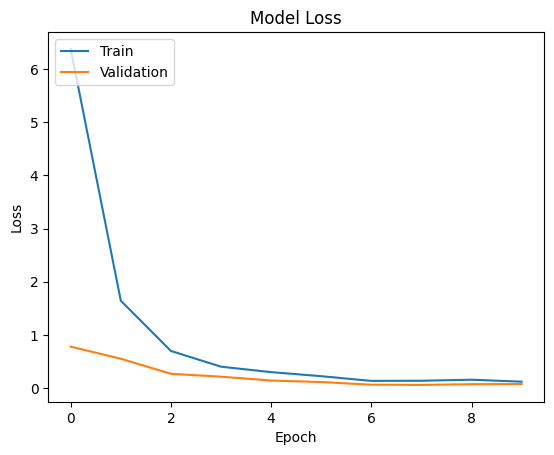

In [19]:
# Plot training dan validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
import pandas as pd
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

# Load saved model
model = load_model('/content/drive/MyDrive/Bangkit-Capstone-CH2-PS132/my_model.h5')

# Load CSV file
csv_file_path = '/content/drive/MyDrive/Bangkit-Capstone-CH2-PS132/test_calories.csv'
df = pd.read_csv(csv_file_path)

# Fungsi prediksi kalori dari gambar yang diberikan
def predict_calories(image_path):
    # Load dan preprocess gambar
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # prediksi
    prediction = model.predict(img_array)

    # Ambil class
    predicted_class = np.argmax(prediction)

    print(predicted_class)

    # Mencari baris yang memiliki kategori sama pada CSV file
    corresponding_row = df[df['category'] == df['category'].unique()[predicted_class]]

    # Check apakah baris kosong
    if not corresponding_row.empty:
        # Extract the calories value
        calories = corresponding_row['calory'].values[0]
        return calories
    else:
        # Handle jika row tidak ditemuka
        print("No matching row found in the CSV file for the predicted class.")
        return None  # or return a default value

# Contoh:
user_image_path = '/content/drive/MyDrive/Bangkit-Capstone-CH2-PS132/test_img_2.jpg'  # Replace with the actual path of the user's image
predicted_calories = predict_calories(user_image_path)

print(f"Predicted Calories: {predicted_calories}")

1/1 [==============================] - 1s 1s/step
0
Predicted Calories: 95.0
